<a href="https://colab.research.google.com/github/akash-ssh/akash-ssh/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
del train['Name']


In [ ]:
del train['PassengerId']
del train['Cabin']
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000




```
# This is formatted as code
```



*   **Pclass** ,**Parch** , **Fare**
*   List item



In [ ]:
del train['Ticket']
train = pd.get_dummies(train,drop_first= True)


In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now we will Notice that the age and fare values are much of the par and we need to faeture scale and in order to have a regular and scaled outcome

In [ ]:
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

We can see

In [ ]:
train.corr()
train['Age'].fillna(train['Age'].mean(),inplace= True)
train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

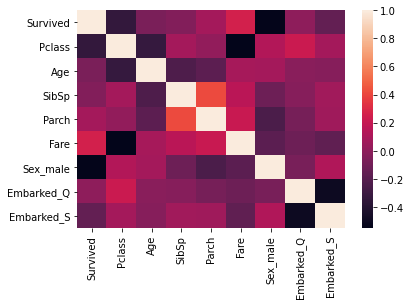

In [ ]:
sns.heatmap(train.corr(),annot =None)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**FEATURE SCALING OF AGE AND FARE !**

In [ ]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
feature_scale = ['Age','Fare']
train[feature_scale] = sts.fit_transform(train[feature_scale])

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,-0.502445,1,0,1
1,1,1,0.638789,1,0,0.786845,0,0,0
2,1,3,-0.284663,0,0,-0.488854,0,0,1
3,1,1,0.407926,1,0,0.420730,0,0,1
4,0,3,0.407926,0,0,-0.486337,1,0,1


In [ ]:
X =train.drop(['Survived'],axis= 1)
y = train['Survived']

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
test .head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
del test['Name']

In [ ]:
del test['Ticket']
del test['Cabin']

In [ ]:
test[feature_scale] = sts.fit_transform(test[feature_scale])

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,0.298549,0,0,-0.497811,Q
1,893,3,female,1.181328,1,0,-0.512660,S
2,894,2,male,2.240662,0,0,-0.464532,Q
3,895,3,male,-0.231118,0,0,-0.482888,S
4,896,3,female,-0.584229,1,1,-0.417971,S


In [ ]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace= True)

In [ ]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test = pd.get_dummies(test,drop_first= True)

In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.298549,0,0,-0.497811,1,1,0
1,893,3,1.181328,1,0,-0.512660,0,0,1
2,894,2,2.240662,0,0,-0.464532,1,1,0
3,895,3,-0.231118,0,0,-0.482888,1,0,1
4,896,3,-0.584229,1,1,-0.417971,0,0,1


In [ ]:
id = test['PassengerId']

In [ ]:
del test['PassengerId']

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.298549,0,0,-0.497811,1,1,0
1,3,1.181328,1,0,-0.512660,0,0,1
2,2,2.240662,0,0,-0.464532,1,1,0
3,3,-0.231118,0,0,-0.482888,1,0,1
4,3,-0.584229,1,1,-0.417971,0,0,1


In [ ]:
output = clf.predict(test)

In [ ]:
submission = pd.DataFrame({'PassengerID' :id,'Survived':output})

In [ ]:
submission.to_csv('Titanic_submission.csv',index = False)